In [342]:
# Import external script
%run models.py

In [343]:
# Import data from CSV
fdata = pd.read_csv('data_histories.csv', index_col="dp_folio")

In [344]:
pm = ProbModel()

In [345]:
# Clusterize between obese and non obese
obesity = {0:[1,2,3], 1:[4,5,6]}
ndata = pm.clusterize_discrete("AIMC", obesity, "obesity", fdata)

# Clusterize excercise features
ejer = {"A":"greatereq_than(2.5)", "B":"less_than(2.5)"}
ndata = pm.clusterize_continuous("ejer_act", ejer, "ejer0B", ndata)
ndata = pm.clusterize_continuous("ejer1", ejer, "ejer1B", ndata)
ndata = pm.clusterize_continuous("ejer5", ejer, "ejer5B", ndata)
ndata = pm.clusterize_continuous("ejer10", ejer, "ejer10B", ndata)
ndata = pm.clusterize_continuous("ejer20", ejer, "ejer20B", ndata)
ndata = pm.clusterize_continuous("ejer30", ejer, "ejer30B", ndata)

ndata = pm.group_list_of_variables(["ejer0B", "ejer1B", "ejer5B", "ejer10B", "ejer20B", "ejer30B"], "ejer0_30", ndata)
ndata = pm.group_list_of_variables(["ejer0B", "ejer1B", "ejer5B", "ejer10B", "ejer20B"], "ejer0_20", ndata)

In [346]:
ndata.head()

,id_sexo,Aedad,AAedad,Apuesto,id_gestud,AIMC,fuma,fuma_act,ejer_act,ejer1,...,rest30,obesity,ejer0B,ejer1B,ejer5B,ejer10B,ejer20B,ejer30B,ejer0_30,ejer0_20
dp_folio,,,,,,,,,,,,,,,,,,,,,
1,F,51,6,Admin,CarTec,4,1,3,0,2,...,0,1,B,B,B,B,B,A,BBBBBA,BBBBB
2,F,38,4,Sec,Bach,3,2,-1,0,0,...,0,0,B,B,A,A,A,B,BBAAAB,BBAAA
3,F,34,3,Int,Sec,5,1,1,0,0,...,-1,1,B,B,B,A,N,N,BBBANN,BBBAN
4,M,63,8,Jef,CarTec,4,2,-1,2,2,...,0,1,B,B,A,A,A,A,BBAAAA,BBAAA
5,M,42,4,EM,Sec,3,1,2,2,2,...,0,0,B,B,B,B,B,B,BBBBBB,BBBBB


## Profiling Histories (Epsilons) - 658 histories with 6 defining features

In [143]:
selected_features = ["ejer0B", "ejer1B", "ejer5B", "ejer10B", "ejer20B", "ejer30B", "ejer0_30", "obesity"]
rdata = ndata[selected_features]
rdata = rdata[(rdata.ejer30B != "N") & (rdata.ejer20B != "N") & (rdata.ejer10B != "N") & (rdata.ejer5B != "N") & (rdata.ejer1B != "N") & (rdata.ejer0B != "N")]
rdata.shape

(658, 8)

In [144]:
query_histories = [
    "BB*A*A",
    "BB*AAA",
    "BB**AA",
    "*B**AA",
    "BB***A",
    "A***A*",
    "AAA***",
    "AA**AA",
    "AA**A*",
    "AA****"
]

In [145]:
for history in query_histories:
    print(pm.get_epsilon("ejer0_30", history, "obesity", 1, rdata))

{'feat': 'ejer0_30', 'cat': 'BB*A*A', 'class': 'obesity', 'classcat': 1, 'epsilon': 3.580947377448846, 'nx': 94, 'ncx': 38, 'nc': 162}
{'feat': 'ejer0_30', 'cat': 'BB*AAA', 'class': 'obesity', 'classcat': 1, 'epsilon': 3.5753717197866424, 'nx': 91, 'ncx': 37, 'nc': 162}
{'feat': 'ejer0_30', 'cat': 'BB**AA', 'class': 'obesity', 'classcat': 1, 'epsilon': 3.557801932817212, 'nx': 113, 'ncx': 44, 'nc': 162}
{'feat': 'ejer0_30', 'cat': '*B**AA', 'class': 'obesity', 'classcat': 1, 'epsilon': 3.42292040747132, 'nx': 131, 'ncx': 49, 'nc': 162}
{'feat': 'ejer0_30', 'cat': 'BB***A', 'class': 'obesity', 'classcat': 1, 'epsilon': 3.25525188991695, 'nx': 137, 'ncx': 50, 'nc': 162}
{'feat': 'ejer0_30', 'cat': 'A***A*', 'class': 'obesity', 'classcat': 1, 'epsilon': -3.155522299416066, 'nx': 157, 'ncx': 21, 'nc': 162}
{'feat': 'ejer0_30', 'cat': 'AAA***', 'class': 'obesity', 'classcat': 1, 'epsilon': -3.155522299416066, 'nx': 157, 'ncx': 21, 'nc': 162}
{'feat': 'ejer0_30', 'cat': 'AA**AA', 'class': 'o

## Generalized Naive Bayes - 939 histories with 5 or 6 defining features

In [347]:
selected_features = ["ejer0_20", "obesity"]
rdata = ndata[(ndata.ejer20B != "N") & (ndata.ejer10B != "N") & (ndata.ejer5B != "N") & (ndata.ejer1B != "N") & (ndata.ejer0B != "N")]
rdata = rdata[selected_features]
rdata.shape

(939, 2)

In [348]:
from sklearn.model_selection import train_test_split as tts

In [349]:
# Split the data between training and test (2/3 for training and 1/3 for testing)
X = rdata[["ejer0_20"]]
Y = rdata["obesity"]
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.333)

In [350]:
# Create the GNB classifier object
gnb = NB()

In [351]:
print(X_train.shape)
print(X_test.shape)
data_train = X_train.join(Y_train)
data_test = X_test.join(Y_test)
data_train.head()

(626, 1)
(313, 1)


,ejer0_20,obesity
dp_folio,,
582,BBAAB,0
314,AAAAA,1
732,BAAAB,0
959,BBAAA,0
794,BBBBB,0


In [352]:
query_histories = [
    "B***A",
    "B*B*A",
    "B**A*",
    "BB*A*",
    "B****",
    "A**A*",
    "AA**A",
    "A*A**",
    "A****",
    "AA***"
]

In [353]:
for history in query_histories:
    print(gnb.get_score_full("ejer0_20", history, "obesity", 1, data_train))

{'feat': 'ejer0_20', 'cat': 'B***A', 'class': 'obesity', 'classcat': 1, 'score': 0.5056688371645786, 'nx': 190, 'ncx': 57, 'nc': 130}
{'feat': 'ejer0_20', 'cat': 'B*B*A', 'class': 'obesity', 'classcat': 1, 'score': 0.7012117403966758, 'nx': 85, 'ncx': 29, 'nc': 130}
{'feat': 'ejer0_20', 'cat': 'B**A*', 'class': 'obesity', 'classcat': 1, 'score': 0.4932199941030683, 'nx': 185, 'ncx': 55, 'nc': 130}
{'feat': 'ejer0_20', 'cat': 'BB*A*', 'class': 'obesity', 'classcat': 1, 'score': 0.6054666834382915, 'nx': 134, 'ncx': 43, 'nc': 130}
{'feat': 'ejer0_20', 'cat': 'B****', 'class': 'obesity', 'classcat': 1, 'score': 0.26126045621734195, 'nx': 393, 'ncx': 99, 'nc': 130}
{'feat': 'ejer0_20', 'cat': 'A**A*', 'class': 'obesity', 'classcat': 1, 'score': -0.5611718260856748, 'nx': 160, 'ncx': 20, 'nc': 130}
{'feat': 'ejer0_20', 'cat': 'AA**A', 'class': 'obesity', 'classcat': 1, 'score': -0.7833328981985364, 'nx': 120, 'ncx': 12, 'nc': 130}
{'feat': 'ejer0_20', 'cat': 'A*A**', 'class': 'obesity', 'cl

In [354]:
# Queries for GNB
buf = np.array(pm.string_generator("", ["A", "B"], 5)).flatten()
hist_posibilities = pm.string_padding("", buf, "")

query_features_gnb = {
    "ejer0_20": hist_posibilities
}

In [355]:
# Train the model and make predictions
gnb.train(query_features_gnb, "obesity", 1, data_train)

In [356]:
gnb.scores_dictionary_full.shape

(32, 8)

In [357]:
# Predict
gnb.predict(data_test)
Y_prob = gnb.predicted_scores

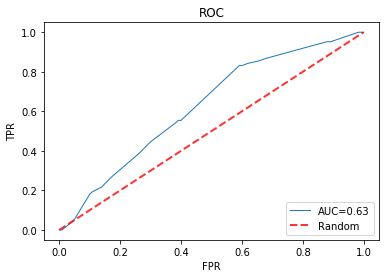

In [358]:
fpr, tpr, thresholds = roc_curve(data_test["obesity"].values, Y_prob.values[:, -1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=1.0, label="AUC=%0.2f" % (roc_auc))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC")
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random', alpha=.8)
plt.legend(loc="lower right")
plt.show()

### Manual ROC Calculation

In [410]:
# Thresholds calculation
max_thresh = Y_prob.max()["total_score"]
min_thresh = Y_prob.min()["total_score"]
dist_thresh = (max_thresh - min_thresh)/32
thresholds = np.arange(min_thresh, max_thresh, dist_thresh)

In [411]:
# Auxiliary functions to calculate TP, TN, FP, FN, TPR and FPR
def true_positives(predicted, original):
    total = 0
    for i in range(len(predicted)):
        if predicted[i] == 1 and original[i] == 1:
            total += 1
    return total


def true_negatives(predicted, original):
    total = 0
    for i in range(len(predicted)):
        if predicted[i] == 0 and original[i] == 0:
            total += 1
    return total


def false_positives(predicted, original):
    total = 0
    for i in range(len(predicted)):
        if predicted[i] == 1 and original[i] == 0:
            total += 1
    return total


def false_negatives(predicted, original):
    total = 0
    for i in range(len(predicted)):
        if predicted[i] == 0 and original[i] == 1:
            total += 1
    return total

def true_positives_rate(predicted, original):
    tp = true_positives(predicted, original)
    fn = false_negatives(predicted, original)
    return tp / (tp + fn)

def false_positives_rate(predicted, original):
    fp = false_positives(predicted, original)
    tn = true_negatives(predicted, original)
    return fp / (fp + tn)


In [412]:
true_positives(predicted, original) + true_negatives(predicted, original) + false_positives(predicted, original) + false_negatives(predicted, original)

313

In [413]:
tpr = []
fpr = []
for threshold in thresholds:
    predicted = gnb.get_predicted_labels(threshold).values.flatten()
    original = data_test["obesity"].values
    tpr.append(true_positives_rate(predicted, original))
    fpr.append(false_positives_rate(predicted, original))

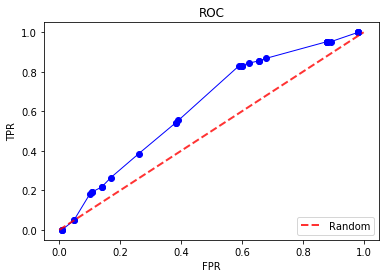

In [414]:
plt.plot(fpr, tpr, 'ob-', lw=1, alpha=1.0)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC")
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random', alpha=.8)
plt.legend(loc="lower right")
plt.show()